In [2]:
from google.colab import files
uploaded = files.upload()

Saving Wheat_Prices_Aggregated.xlsx to Wheat_Prices_Aggregated.xlsx


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.express as px

In [4]:
# Load the wheat price data
df = pd.read_excel('Wheat_Prices_Aggregated.xlsx', index_col='Date', parse_dates=True)

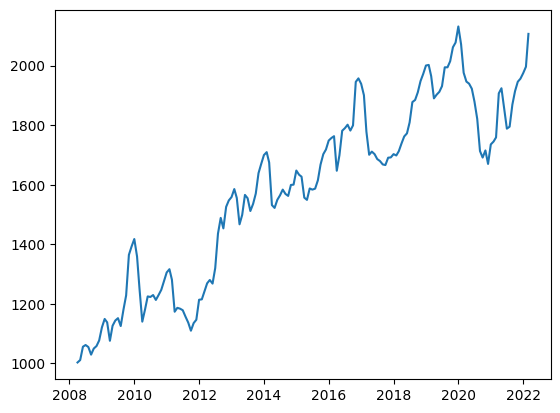

In [5]:
plt.plot(df.index, df['Modal Price_Wheat'])
plt.show()

In [6]:
# Training Test Split
to_row = int(len(df)*0.8)

In [7]:
to_row = int(len(df)*0.8)
training_data = list(df[0:to_row]['Modal Price_Wheat'])
testing_data = list(df[to_row:]['Modal Price_Wheat'])

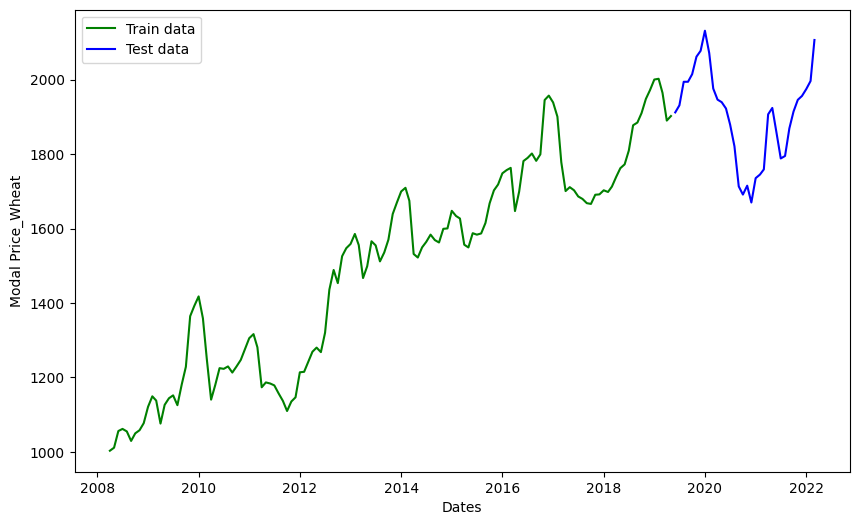

In [8]:
#split data into training and testing set
plt.figure(figsize=(10,6))
plt.grid=(True)
plt.xlabel('Dates')
plt.ylabel('Modal Price_Wheat')
plt.plot(df[0:to_row]['Modal Price_Wheat'],'green', label='Train data')
plt.plot(df[to_row:]['Modal Price_Wheat'],'blue', label='Test data')
plt.legend()

In [9]:
model_predictions = []
n_test_obser = len(testing_data)

In [10]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output)
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  #print(output)
  #break

In [11]:
list(output)

[1998.9283489540383]

In [12]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  167
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -862.136
Date:                Sat, 22 Apr 2023   AIC                           1734.272
Time:                        01:45:51   BIC                           1749.832
Sample:                             0   HQIC                          1740.588
                                - 167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3648      0.076      4.781      0.000       0.215       0.514
ar.L2         -0.1613      0.096     -1.674      0.094      -0.350       0.028
ar.L3          0.0005      0.086      0.006      0.9

In [13]:
len(model_predictions)

34

In [14]:
len(testing_data)

34

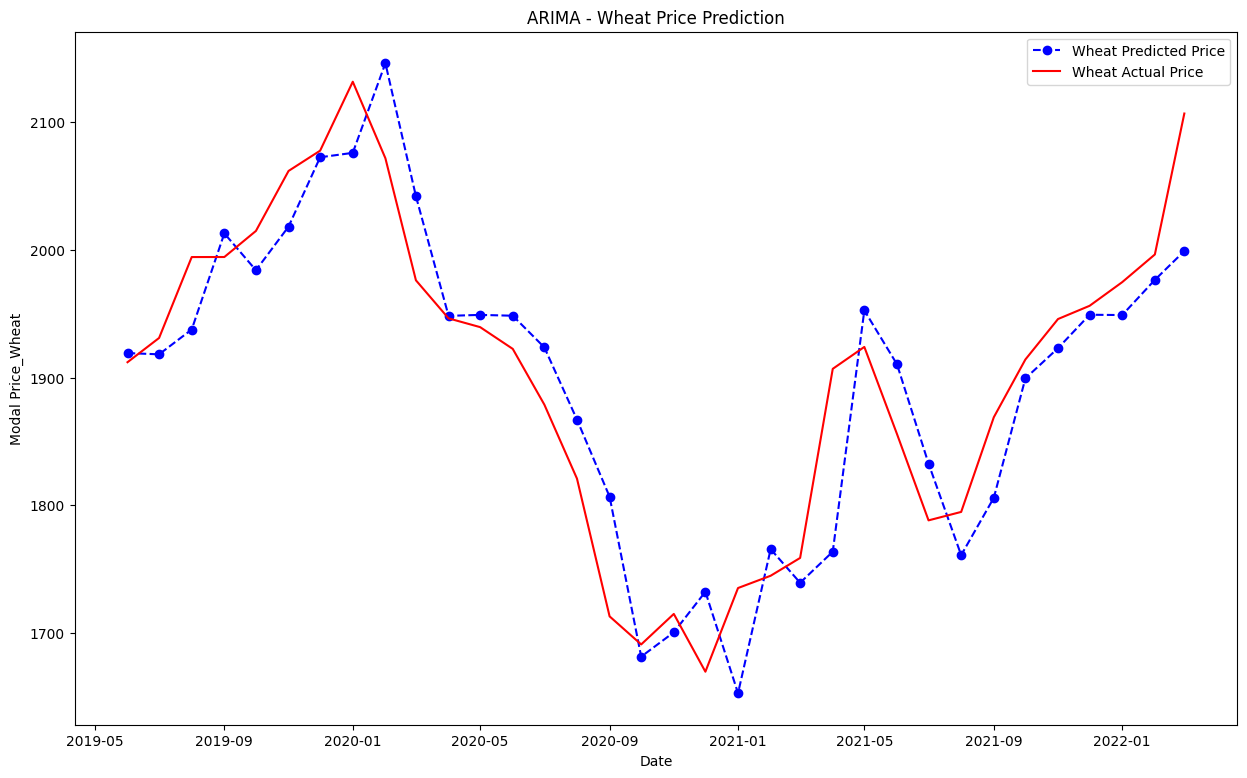

In [15]:
plt.figure(figsize=(15,9))
plt.grid=(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'Wheat Predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'Wheat Actual Price')
plt.title('ARIMA - Wheat Price Prediction')
plt.xlabel('Date')
plt.ylabel('Modal Price_Wheat')
plt.legend()
plt.show()




In [16]:
#report performance
mape = np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.abs(testing_data))
print ('MAPE:'+str(mape))

MAPE:0.07305036659816665


In [17]:
MSE = np.square(np.subtract(testing_data,model_predictions)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

172.02189301714475
